<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/08_02_DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Deep Convolutional Neural Network**
The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH06/CH06_SEC05_1_DeepCNN.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
import requests

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
# Local path where you want to store the file
local_file_path = 'lettersTestSet.mat'

# URL of the .mat file
url = 'https://github.com/kursatkara/databook_python/raw/master/DATA/lettersTestSet.mat'

# Check if the file already exists
if not os.path.exists(local_file_path):
    # Download the .mat file
    print("Downloading the file...")
    r = requests.get(url)
    if r.status_code == 200:
        # If download is successful, save the file locally
        with open(local_file_path, 'wb') as f:
            f.write(r.content)
        print("Download completed successfully.")
    else:
        print("Failed to retrieve the data. HTTP Status Code: {}".format(r.status_code))
else:
    print("File already exists.")

# Load the .mat file
letters_test_mat = io.loadmat(local_file_path)



File already exists.


In [3]:
# Local path where you want to store the file
local_file_path = 'lettersTrainSet.mat'

# URL of the .mat file
url = 'https://github.com/kursatkara/databook_python/raw/master/DATA/lettersTrainSet.mat'

# Check if the file already exists
if not os.path.exists(local_file_path):
    # Download the .mat file
    print("Downloading the file...")
    r = requests.get(url)
    if r.status_code == 200:
        # If download is successful, save the file locally
        with open(local_file_path, 'wb') as f:
            f.write(r.content)
        print("Download completed successfully.")
    else:
        print("Failed to retrieve the data. HTTP Status Code: {}".format(r.status_code))
else:
    print("File already exists.")

# Load the .mat file
letters_train_mat = io.loadmat(local_file_path)

File already exists.


In [4]:
XTrain = letters_train_mat['XTrain']
TTrain = letters_train_mat['TTrain_cell']
XTest = letters_test_mat['XTest']
TTest = letters_test_mat['TTest_cell']

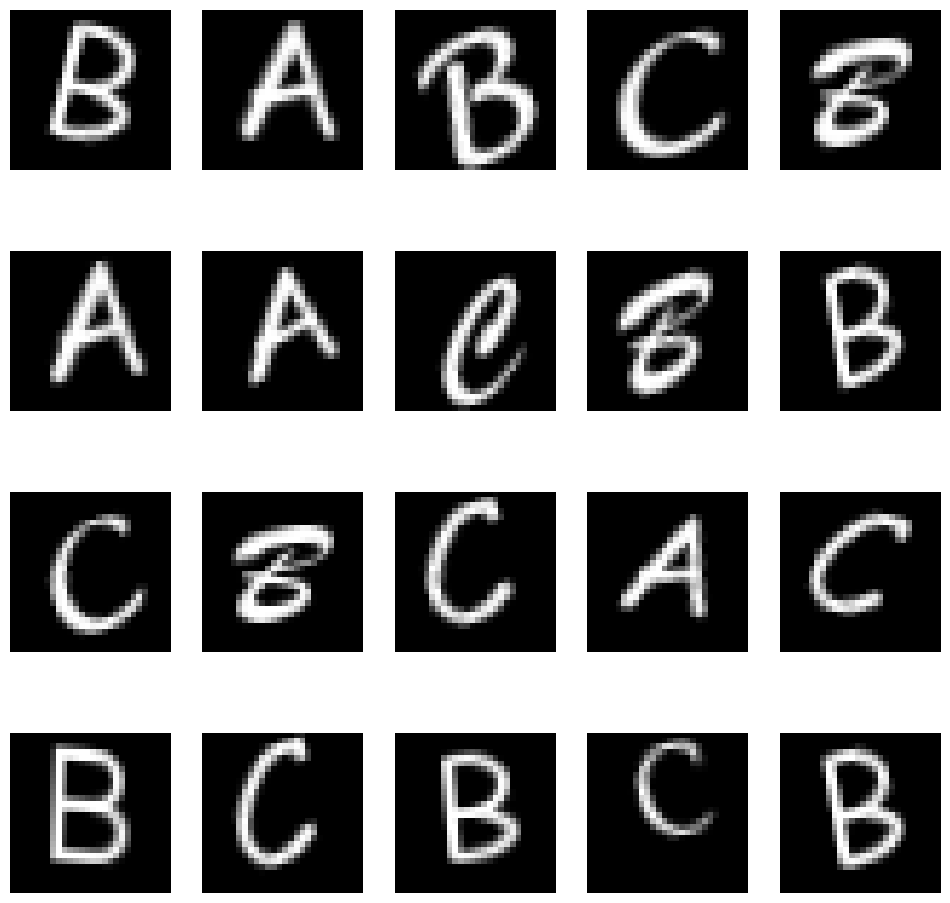

In [5]:
perm = np.random.permutation(1500)[:20]

# By default, Keras expects data in form (batch, height, width, channels)
XTrain = np.transpose(XTrain,axes=[3,0,1,2])
XTest = np.transpose(XTest,axes=[3,0,1,2])

fig,axs = plt.subplots(4,5)
axs = axs.reshape(-1)

for j in range(len(axs)):
    axs[j].imshow(np.squeeze(XTrain[perm[j],:,:,:]),cmap='gray')
    axs[j].axis('off')

In [6]:
classes = np.unique(TTrain)
y_train_label = np.zeros_like(TTrain)
y_test_label = np.zeros_like(TTest)
for nc in range(len(classes)):
    y_train_label[TTrain == classes[nc]] = nc
    y_test_label[TTest == classes[nc]] = nc

y_train_label = y_train_label.reshape(-1)
y_test_label = y_test_label.reshape(-1)

#one-hot encode categorical classes
y_train = to_categorical(y_train_label)
y_test = to_categorical(y_test_label)

In [7]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(len(classes), activation='softmax'))

sgd_optimizer = optimizers.SGD(momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')
model.fit(XTrain, y_train, epochs=30)

Epoch 1/30
47/47 [==============================] - 3s 21ms/step - loss: 0.5020
Epoch 2/30
47/47 [==============================] - 1s 18ms/step - loss: 0.0589
Epoch 3/30
47/47 [==============================] - 1s 21ms/step - loss: 0.0185
Epoch 4/30
47/47 [==============================] - 1s 24ms/step - loss: 0.0102
Epoch 5/30
47/47 [==============================] - 1s 25ms/step - loss: 0.0078
Epoch 6/30
47/47 [==============================] - 1s 26ms/step - loss: 0.0057
Epoch 7/30
47/47 [==============================] - 1s 21ms/step - loss: 0.0046
Epoch 8/30
47/47 [==============================] - 1s 22ms/step - loss: 0.0039
Epoch 9/30
47/47 [==============================] - 1s 18ms/step - loss: 0.0033
Epoch 10/30
47/47 [==============================] - 1s 24ms/step - loss: 0.0029
Epoch 11/30
47/47 [==============================] - 1s 27ms/step - loss: 0.0026
Epoch 12/30
47/47 [==============================] - 1s 27ms/step - loss: 0.0023
Epoch 13/30
47/47 [==================

In [8]:
YPredict = np.argmax(model.predict(XTest),axis=1)
# argmax reverses the one-hot encoding scheme

accuracy = np.sum(YPredict == y_test_label)/len(y_test_label)
print('Accuracy = {}'.format(accuracy))

47/47 [==============================] - 0s 4ms/step
Accuracy = 0.8966666666666666
